In [47]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import time
from PyPortfolio import *
from tqdm.auto import tqdm
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','TLT'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  2 of 2 completed


In [43]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [71]:

portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


In [72]:
a = global_minimum_variance(return_series=riskreturn_object.get_return_series(), periodicity='M')

In [73]:
semi_deviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

TLT      1.460839
^GSPC    0.723152
dtype: float64

In [74]:
maximum_semideviation_ratio(return_series=riskreturn_object.get_return_series(), periodicity='M')

(True, array([1.00000000e+00, 7.04991621e-15]))

In [33]:
def resample_():
    arg = [ returns_monthly.sample(24, replace=True) for _ in range(10000)]

    def resample_gmv_internal(return_series):
        gmv = global_minimum_variance(return_series, 'M')
        return (gmv[1])
    weights = []
    for i in tqdm(arg):
        weights.append(resample_gmv_internal(i))
    
    return weights

In [34]:
t1 = time.perf_counter()
weights_normal = resample_()
t2 = time.perf_counter()
t2-t1

100%|██████████| 10000/10000 [01:36<00:00, 103.76it/s]


99.15723508799988

array([[<AxesSubplot:title={'center':'TLT'}>,
        <AxesSubplot:title={'center':'^GSPC'}>]], dtype=object)

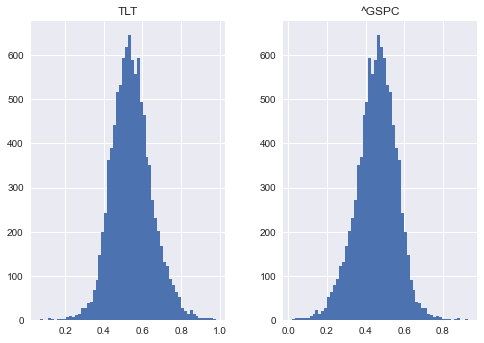

In [37]:
df = pd.DataFrame(data=weights_normal, columns=returns_monthly.columns)
df.hist(bins=60)

In [57]:
pr = portfolio_returns(df.median().to_numpy(),returns_monthly)

pr_obj = RiskReturn(return_series=pr, periodicity="M")

Date
2005-02-28    0.000785
2005-03-31   -0.011266
2005-04-30    0.011554
2005-05-31    0.030719
2005-06-30    0.011598
                ...   
2020-08-31    0.005118
2020-09-30   -0.013923
2020-10-31   -0.030999
2020-11-30    0.058561
2020-12-31    0.001662
Freq: M, Name: Portfolio Return, Length: 191, dtype: float64

In [54]:
portfolio_returns(df.median().to_numpy(),returns_monthly)

Date
2005-02-28    0.000785
2005-03-31   -0.011266
2005-04-30    0.011554
2005-05-31    0.030719
2005-06-30    0.011598
                ...   
2020-08-31    0.005118
2020-09-30   -0.013923
2020-10-31   -0.030999
2020-11-30    0.058561
2020-12-31    0.001662
Freq: M, Name: Portfolio Return, Length: 191, dtype: float64